#KNN and PCA

1.  What is K-Nearest Neighbors (KNN) and how does it work in both
classification and regression problems?

Ans- K-Nearest Neighbors (KNN):
It is a supervised learning algorithm that makes predictions based on the similarity (distance) between data points.

Classification: Finds the k closest neighbors and assigns the class that appears most frequently among them (majority voting).

Regression: Finds the k closest neighbors and predicts the value by averaging their target values.

2. What is the Curse of Dimensionality and how does it affect KNN
performance?

Ans- Curse of Dimensionality:
It refers to problems that arise when data has too many features (high dimensions).

Effect on KNN:

Distances between points become less meaningful (all points seem equally far).

Nearest neighbors may not be truly "close."

Leads to poor accuracy, high computation, and overfitting.

3. What is Principal Component Analysis (PCA)? How is it different from
feature selection?

Ans- Principal Component Analysis (PCA):
It is a dimensionality reduction technique that transforms original features into a smaller set of new, uncorrelated features (called principal components) that capture maximum variance in the data.

Difference from Feature Selection:

PCA: Creates new features by combining existing ones (feature transformation).

Feature Selection: Keeps only the most important original features, discarding the rest.

4. What are eigenvalues and eigenvectors in PCA, and why are they
important?

Ans- Eigenvalues and Eigenvectors in PCA:

Eigenvectors: Directions (axes) along which the data varies the most → define the principal components.

Eigenvalues: Magnitude of variance captured by each eigenvector → tell how important each component is.

Importance:

Eigenvectors = new feature directions.

Eigenvalues = decide how much variance each direction explains → used to rank/select components.

5.  How do KNN and PCA complement each other when applied in a single
pipeline?

Ans- KNN + PCA in a pipeline:

PCA reduces dimensionality, removes noise, and keeps only the most informative features.

KNN then works better because distances between points become more meaningful in lower dimensions.

6. Train a KNN Classifier on the Wine dataset with and without feature
scaling. Compare model accuracy in both cases.

KNN Accuracy without Scaling: 0.8055555555555556
KNN Accuracy with Scaling: 0.9722222222222222


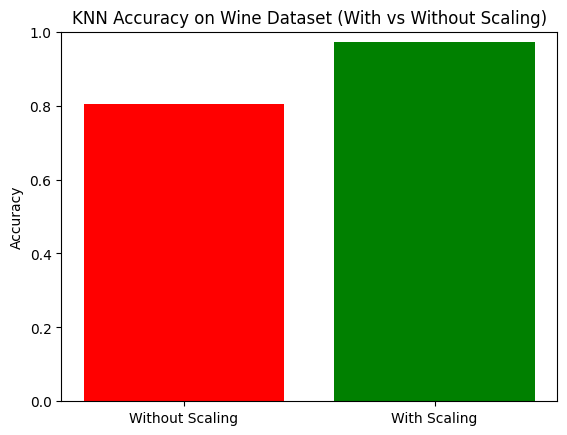

In [1]:
# Import libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- KNN Without Scaling ---
knn_no_scaling = KNeighborsClassifier(n_neighbors=5)
knn_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = knn_no_scaling.predict(X_test)
acc_no_scaling = accuracy_score(y_test, y_pred_no_scaling)

# --- KNN With Scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaling = KNeighborsClassifier(n_neighbors=5)
knn_scaling.fit(X_train_scaled, y_train)
y_pred_scaling = knn_scaling.predict(X_test_scaled)
acc_scaling = accuracy_score(y_test, y_pred_scaling)

# Print results
print("KNN Accuracy without Scaling:", acc_no_scaling)
print("KNN Accuracy with Scaling:", acc_scaling)

# Plot comparison
methods = ["Without Scaling", "With Scaling"]
accuracies = [acc_no_scaling, acc_scaling]

plt.bar(methods, accuracies, color=["red", "green"])
plt.ylabel("Accuracy")
plt.title("KNN Accuracy on Wine Dataset (With vs Without Scaling)")
plt.ylim(0, 1)
plt.show()


7. : Train a PCA model on the Wine dataset and print the explained variance
ratio of each principal component.

In [2]:
# Import libraries
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA

# Load Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Apply PCA (keep all components)
pca = PCA()
pca.fit(X)

# Print explained variance ratio
print("Explained Variance Ratio of each Principal Component:")
print(pca.explained_variance_ratio_)


Explained Variance Ratio of each Principal Component:
[9.98091230e-01 1.73591562e-03 9.49589576e-05 5.02173562e-05
 1.23636847e-05 8.46213034e-06 2.80681456e-06 1.52308053e-06
 1.12783044e-06 7.21415811e-07 3.78060267e-07 2.12013755e-07
 8.25392788e-08]


8.  Train a KNN Classifier on the PCA-transformed dataset (retain top 2
components). Compare the accuracy with the original dataset.


In [3]:
# Import libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Load Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- KNN on Original Dataset (with scaling) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train_scaled, y_train)
acc_original = accuracy_score(y_test, knn_original.predict(X_test_scaled))

# --- PCA Transformation (retain top 2 components) ---
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
acc_pca = accuracy_score(y_test, knn_pca.predict(X_test_pca))

# Print results
print("KNN Accuracy on Original Dataset (scaled):", acc_original)
print("KNN Accuracy on PCA-transformed Dataset (2 components):", acc_pca)


KNN Accuracy on Original Dataset (scaled): 0.9722222222222222
KNN Accuracy on PCA-transformed Dataset (2 components): 0.9166666666666666


9.  Train a KNN Classifier with different distance metrics (euclidean,
manhattan) on the scaled Wine dataset and compare the results.


In [4]:
# Import libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- KNN with Euclidean Distance ---
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
knn_euclidean.fit(X_train_scaled, y_train)
acc_euclidean = accuracy_score(y_test, knn_euclidean.predict(X_test_scaled))

# --- KNN with Manhattan Distance ---
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric="manhattan")
knn_manhattan.fit(X_train_scaled, y_train)
acc_manhattan = accuracy_score(y_test, knn_manhattan.predict(X_test_scaled))

# Print results
print("KNN Accuracy with Euclidean Distance:", acc_euclidean)
print("KNN Accuracy with Manhattan Distance:", acc_manhattan)


KNN Accuracy with Euclidean Distance: 0.9722222222222222
KNN Accuracy with Manhattan Distance: 1.0


10. : You are working with a high-dimensional gene expression dataset to
classify patients with different types of cancer.
Due to the large number of features and a small number of samples, traditional models
overfit.
Explain how you would:
● Use PCA to reduce dimensionality
● Decide how many components to keep
● Use KNN for classification post-dimensionality reduction
● Evaluate the model
● Justify this pipeline to your stakeholders as a robust solution for real-world
biomedical data

 Ans- Use PCA to remove noisy, redundant gene features and concentrate variance into fewer axes (principal components).
Frontiers

Decide components by (a) cumulative explained variance (e.g., 90–99%) or (b) use nested CV/grid search to pick n_components that gives best validation performance.
mikulskibartosz.name
Oxford Academic

KNN after PCA: fit scaler → PCA (with chosen n_components) → KNN; KNN benefits because distances are more meaningful in lower-dim space.
DIVA Portal

Evaluate with nested CV (outer fold for performance, inner fold for hyperparameter selection) using stratified folds and metrics such as balanced accuracy / macro F1 / ROC-AUC (if binary).
PMC

Stakeholder justification: reduces overfitting, improves interpretability (scree / variance explained), reproducible selection via nested CV, and uses a well-understood, computationally efficient pipeline frequently used in genomics.

In [5]:
# -*- coding: utf-8 -*-
"""
Pipeline: scaling -> PCA -> KNN with nested CV for a high-dim gene expression dataset
Replace the data-loading section with your real data (CSV, hdf5, scikit-learn loader, etc.)
"""

import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, balanced_accuracy_score, f1_score, accuracy_score
from sklearn.metrics import classification_report

# -----------------------
# 1) LOAD DATA (replace this with your loader)
# -----------------------
# Example: assume CSVs with samples as rows, genes as columns, and 'label' column for class
# df = pd.read_csv("gene_expression.csv")
# X = df.drop(columns=["label"]).values
# y = df["label"].values

# For demonstration, here is a placeholder using sklearn's breast cancer (replace in real use)
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data   # <- replace with gene matrix (samples x genes)
y = data.target

# -----------------------
# 2) Quick PCA exploratory step (compute explained variance to guide initial choice)
# -----------------------
from sklearn.preprocessing import StandardScaler
scaler_tmp = StandardScaler()
X_scaled_tmp = scaler_tmp.fit_transform(X)

pca_tmp = PCA(n_components=min(X_scaled_tmp.shape[0], X_scaled_tmp.shape[1]))
pca_tmp.fit(X_scaled_tmp)
explained = pca_tmp.explained_variance_ratio_
cumulative = np.cumsum(explained)

# Print first few cumulative explained ratios
print("Cumulative explained variance (first 20 components):")
for i, val in enumerate(cumulative[:20], start=1):
    print(f"PC{i}: {val:.4f}")

# Option A: pick n_components by threshold (e.g., 0.95)
threshold = 0.95
n_comp_by_threshold = int(np.searchsorted(cumulative, threshold) + 1)
print(f"\nComponents to reach {threshold*100:.0f}% variance: {n_comp_by_threshold}")

# -----------------------
# 3) Nested CV with pipeline (automated selection of n_components and KNN hyperparams)
# -----------------------
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA()),             # n_components will be tuned
    ("knn", KNeighborsClassifier())
])

# Grid of hyperparameters
param_grid = {
    "pca__n_components": [5, 10, 20, 50],            # adapt depending on your data size
    "knn__n_neighbors": [3, 5, 7, 9],
    "knn__metric": ["euclidean", "manhattan"]
}

# Scoring: use balanced accuracy and macro-F1 (custom scorer for grid if needed)
scoring = {
    "bal_acc": make_scorer(balanced_accuracy_score),
    "macro_f1": make_scorer(f1_score, average="macro")
}

# Inner CV (for hyperparameter search)
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring=scoring,
    refit="bal_acc",          # which metric to use for selecting best parameters
    cv=inner_cv,
    n_jobs=-1,
    verbose=1
)

# Outer CV (for honest performance estimate)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Perform nested CV - this runs GridSearch inside each outer fold
# cross_val_score will return the 'bal_acc' (since GridSearchCV refit uses that metric)
nested_scores = cross_val_score(grid, X, y, cv=outer_cv, scoring=make_scorer(balanced_accuracy_score), n_jobs=-1)

print("\nNested CV balanced-accuracy scores (outer folds):", nested_scores)
print("Mean balanced-accuracy: {:.4f} ± {:.4f}".format(nested_scores.mean(), nested_scores.std()))

# -----------------------
# 4) Fit final model on full data using best params found by GridSearchCV on entire dataset
# -----------------------
# Re-run GridSearch on whole dataset to get best estimator
grid.fit(X, y)
print("\nBest params found (on full training data):", grid.best_params_)
best_model = grid.best_estimator_

# Optional: show explained variance of selected n_components
if hasattr(best_model.named_steps["pca"], "explained_variance_ratio_"):
    evr = best_model.named_steps["pca"].explained_variance_ratio_
    print("\nExplained variance ratio of PCA components used:")
    for i, v in enumerate(evr, start=1):
        print(f"PC{i}: {v:.4e}")

# -----------------------
# 5) If you have a held-out test set, evaluate final model:
# -----------------------
# Example (if you had X_test, y_test):
# y_pred = best_model.predict(X_test)
# print(classification_report(y_test, y_pred))
# print("Balanced acc:", balanced_accuracy_score(y_test, y_pred))


Cumulative explained variance (first 20 components):
PC1: 0.4427
PC2: 0.6324
PC3: 0.7264
PC4: 0.7924
PC5: 0.8473
PC6: 0.8876
PC7: 0.9101
PC8: 0.9260
PC9: 0.9399
PC10: 0.9516
PC11: 0.9614
PC12: 0.9701
PC13: 0.9781
PC14: 0.9834
PC15: 0.9865
PC16: 0.9892
PC17: 0.9911
PC18: 0.9929
PC19: 0.9945
PC20: 0.9956

Components to reach 95% variance: 10

Nested CV balanced-accuracy scores (outer folds): [0.95807403 0.98837209 0.96230159 0.95734127 0.95724346]
Mean balanced-accuracy: 0.9647 ± 0.0120
Fitting 5 folds for each of 32 candidates, totalling 160 fits

Best params found (on full training data): {'knn__metric': 'euclidean', 'knn__n_neighbors': 9, 'pca__n_components': 20}

Explained variance ratio of PCA components used:
PC1: 4.4272e-01
PC2: 1.8971e-01
PC3: 9.3932e-02
PC4: 6.6021e-02
PC5: 5.4958e-02
PC6: 4.0245e-02
PC7: 2.2507e-02
PC8: 1.5887e-02
PC9: 1.3896e-02
PC10: 1.1690e-02
PC11: 9.7972e-03
PC12: 8.7054e-03
PC13: 8.0452e-03
PC14: 5.2337e-03
PC15: 3.1378e-03
PC16: 2.6621e-03
PC17: 1.9800e-

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py", line 654, in fit
    Xt = self._fit(X, y, routed_params, 